<div class="alert alert-block alert-success">
    

   

</div>

# Title

**Predictive Pricing Model for Airbnb Listings in Rio de Janeiro**

<a id='Go to the top'></a>
# Tables of Content 


1. [Executive Summary.](#Executive-Summary)

> Overview of Airbnb
>> Objective of the Analysis

4. [Data Collection and Cleaning](#Data-Collection-and-Cleaning)
>Loading Data
>> Data Head
>>>Data Columns
>>>>Number of Rows and Columns
>>>>>Checking for NaNs


5. [Exploratory Data Analysis (EDA) and Data Cleaning](#Exploratory-Data-Analysis-(EDA)-and-Data-Cleaning)

>Removing Outliers
>>Standardize Numerical Columns
>>>One-Hot Encoding

   5.1. [Pricing Analysis](#Pricing-Analysis)

>Correlation Matrix
>>Price Distribution
>>>Box Plot of Price Distribution



5.2. [Property Type Analysis](#Property-Type-Analysis)

>Distribution of Property Types
>>Average Price by Property Type


5.3. [Beds Analysis](#Bed-Analysis)
>Count Plot for Number of Beds

5.4. [Amenities Analysis](#Amenities-Analysis)

>Distribution of Amenities
>>Correlation Heatmap

6. [Modeling Approach and Regression Models](#Modeling-Approach-and-Regression-Models)

>Data Cleaning and Preprocessing
>>Model Training and Evaluation


6.1.[Model Performance Comparison](#Model-Performance-Comparison)
>Feature Importance

7. [Conclusion](#Conclusion)

8. [Recommendations](#Recommendations)


# Executive Summary 

<div class="alert alert-block alert-info">


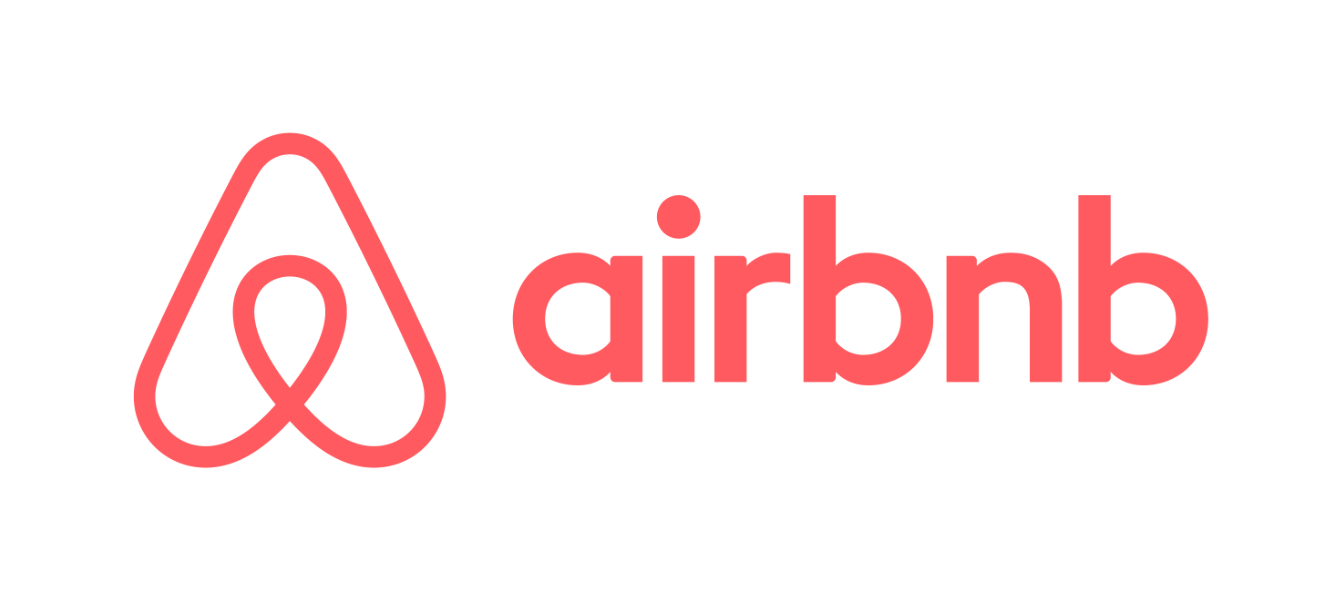
    





    


**Overview of Airbnb**

Airbnb is an online platform where you can rent short-term houses and apartments. For example, you can rent out your home for a week while you're on vacation, or rent out an empty bedroom. Pricing on Airbnb works like any market: the amount a host charges depends on supply and demand.

**Objective of the Analysis**

Most Airbnb hosts are people with extra space who want to earn some money without worrying about advertising and insurance. Airbnb takes care of that, but it cannot help hosts set their prices. Prices vary by country, currency, neighborhood, and the host, making it too complex for Airbnb to provide general pricing advice.

The goal of this analysis is to clean and visualize Airbnb data from Rio de Janeiro and create a simple predictive model. This model will help hosts in Rio de Janeiro price their listings based on market standards. While the model may offer some accuracy for simplicity, it will be user-friendly for the general public.

[Go to the top](#Tables-of-Content)

In [5]:
import numpy as np #Deal with numbers and arrays
import pandas as pd #Create dataframes and sort/clean data faster

import matplotlib.pyplot as plt #Visualization module
import seaborn as sns #Makes matplotlib prettier

#This blocks imports everything needed from sklearn(models, procession packages, and metrics)
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor # XGB regression model
from scipy import stats #Provides statistical functions, including Z-score.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
!pip install xgboost

[Go to the top](#Tables-of-Content)

# Data Collection and Cleaning

**Data**
    
In this analysis, we explore Airbnb listings in Rio de Janeiro to develop a predictive pricing model. Each listing includes a unique ID, longitude coordinate, and details about capacity such as the number of guests, bathrooms, beds, and bedrooms. The month of availability captures seasonal trends, while the amenities count reflects comfort levels. Property type, price (our target variable), and whether the host is a superhost are also included.

Location details cover the street, neighborhood, city, state, and zipcode. Market context and room types are specified, along with bed types. Additional costs are represented by security deposits, cleaning fees, and extra people charges. Guest feedback is measured through the number of reviews, average rating, and reviews per month. This comprehensive dataset will help us understand the factors influencing Airbnb prices, enabling hosts to set competitive, market-aligned prices for their listings.

## Loading data 

NB: this is the code used to generate the dataset used. More info on how it works (https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro)


In [9]:


# Specify the file path
file_path = 'total_data.csv'

# Define the columns to read
usecols = ['id', 'longitude', 'accommodates', 'bathrooms', 'beds', 
           'month', 'amenities', 'property_type', 'bedrooms', 
           'price', 'host_is_superhost', 'host_neighbourhood', 
           'street', 'host_listings_count', 'neighbourhood', 
           'city', 'state', 'zipcode', 'market', 'room_type', 
           'bed_type', 'security_deposit', 'cleaning_fee', 
           'extra_people', 'number_of_reviews', 'review_scores_rating', 
           'reviews_per_month']

# Read the CSV file in chunks
chunksize = 100000  # Adjust chunk size as needed
chunks = pd.read_csv(file_path, usecols=usecols, chunksize=chunksize)

# Concatenate chunks into a single DataFrame
df = pd.concat(chunks)





C:\Users\bptzv\AppData\Local\Temp\ipykernel_17984\1049281254.py:19: DtypeWarning: Columns (1,33,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(chunks)


**Data head**

In [10]:
df.head()

,id,host_is_superhost,host_neighbourhood,host_listings_count,street,neighbourhood,city,state,zipcode,market,...,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people,number_of_reviews,review_scores_rating,reviews_per_month,month
0,17878,f,Copacabana,2.0,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,...,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$307.00,$0.00,$311.00,$58.00,213.0,93.0,2.16,8.0
1,24480,f,Ipanema,1.0,"Rio de Janeiro, Rio de Janeiro, Brazil",Ipanema,Rio de Janeiro,Rio de Janeiro,22411-010,Rio De Janeiro,...,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""First ...",$233.00,$889.00,$220.00,$225.00,85.0,95.0,0.88,8.0
2,25026,f,Copacabana,3.0,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Rio de Janeiro,Rio de Janeiro,22060-020,Rio De Janeiro,...,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$159.00,"$1,000.00",$220.00,$45.00,214.0,94.0,2.15,8.0
3,31560,t,Ipanema,1.0,"Rio de Janeiro, RJ, Brazil",Ipanema,Rio de Janeiro,RJ,22410-003,Rio De Janeiro,...,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$253.00,$0.00,$78.00,$39.00,215.0,96.0,2.18,8.0
4,35636,f,Ipanema,1.0,"Rio de Janeiro, Rio de Janeiro, Brazil",Ipanema,Rio de Janeiro,Rio de Janeiro,22081-020,Rio De Janeiro,...,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$350.00,$971.00,$152.00,$58.00,122.0,94.0,2.08,8.0


**Data columns**

In [11]:
print(df.columns)

Index(['id', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'street', 'neighbourhood', 'city', 'state', 'zipcode', 'market',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'reviews_per_month', 'month'],
      dtype='object')


**Number of rows and columns**

In [6]:
df.isnull().sum()

id                           0
host_is_superhost          386
host_neighbourhood      298201
host_listings_count        386
street                       2
neighbourhood            50940
city                      1546
state                     1107
zipcode                  40634
market                    1078
longitude                    1
property_type                1
room_type                    1
accommodates                 1
bathrooms                 1494
bedrooms                   776
beds                      2335
bed_type                     1
amenities                    1
price                        1
security_deposit        361064
cleaning_fee            269336
extra_people                 1
number_of_reviews            1
review_scores_rating    384939
reviews_per_month       364066
month                        2
dtype: int64

In [7]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')


Rows: 784122, Columns: 27


**Checking for NaN's**

In [8]:
df.dropna(inplace=True)
print(f'{df.shape} - {df.shape[0]} rows dropped')
df.fillna(0)
df.drop_duplicates()
df.isnull().sum()

(184076, 27) - 184076 rows dropped


id                      0
host_is_superhost       0
host_neighbourhood      0
host_listings_count     0
street                  0
neighbourhood           0
city                    0
state                   0
zipcode                 0
market                  0
longitude               0
property_type           0
room_type               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
bed_type                0
amenities               0
price                   0
security_deposit        0
cleaning_fee            0
extra_people            0
number_of_reviews       0
review_scores_rating    0
reviews_per_month       0
month                   0
dtype: int64

[Go to the top](#Tables-of-Content)

# Exploratory Data Analysis (EDA) and Data Cleaning

I will involve examining each variable that contains outliers using prescriptive approach. This process will allow visualization of how addressing outliers enhances the overall distribution of the dataset. The process of handling outliers using the Z-score method involves standardizing data to determine how many standard deviations each value is from the mean. Values with Z-scores exceeding 3 are flagged as outliers. Rows containing these outliers are removed, resulting in a dataset with improved distribution and quality for analysis.

**Removing Outliers**

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
df[~outliers]
print("Shape of the DataFrame after removing outliers:", df.shape)

Shape of the DataFrame after removing outliers: (184076, 27)


**Standardize numerical columns**

In [10]:
#Standardization ensures means near 0 and standard deviations near 1, improving analysis accuracy and enhancing machine learning performance and reliability.
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
means = df[numeric_cols].mean()
stds = df[numeric_cols].std()

print("Means of standardized columns:\n", means)
print("Standard deviations of standardized columns:\n", stds)

Means of standardized columns:
 longitude               6.205294e-14
bathrooms              -1.559461e-17
bedrooms                9.140601e-17
beds                    4.292377e-17
number_of_reviews      -9.881730e-18
review_scores_rating    6.836922e-16
reviews_per_month      -1.059198e-16
month                   1.877529e-16
dtype: float64
Standard deviations of standardized columns:
 longitude               1.000003
bathrooms               1.000003
bedrooms                1.000003
beds                    1.000003
number_of_reviews       1.000003
review_scores_rating    1.000003
reviews_per_month       1.000003
month                   1.000003
dtype: float64


**One-Hot Encoding**

In [11]:
cat_cols = ['property_type', 'room_type', 'city' , 'price']
df_encoded = pd.get_dummies(df, columns=cat_cols)

print(df_encoded.head())
print(df_encoded.columns)

      id host_is_superhost host_neighbourhood host_listings_count  \
0  17878                 f         Copacabana                 2.0   
1  24480                 f            Ipanema                 1.0   
2  25026                 f         Copacabana                 3.0   
3  31560                 t            Ipanema                 1.0   
4  35636                 f            Ipanema                 1.0   

                                   street neighbourhood           state  \
0  Rio de Janeiro, Rio de Janeiro, Brazil    Copacabana  Rio de Janeiro   
1  Rio de Janeiro, Rio de Janeiro, Brazil       Ipanema  Rio de Janeiro   
2  Rio de Janeiro, Rio de Janeiro, Brazil    Copacabana  Rio de Janeiro   
3              Rio de Janeiro, RJ, Brazil       Ipanema              RJ   
4  Rio de Janeiro, Rio de Janeiro, Brazil       Ipanema  Rio de Janeiro   

     zipcode          market  longitude  ... price_$99.00  price_$990.00  \
0  22020-050  Rio De Janeiro   0.579609  ...        False 

In [12]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

#Selecting all numeric columns including 'price'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Identifying  relationships
correlation_matrix = df[numeric_cols].corr()


price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(df[numeric_cols].describe())
print("\nCorrelation with 'price' column:")
print(price_correlations)


    

          longitude     bathrooms      bedrooms          beds          price  \
count  1.840760e+05  1.840760e+05  1.840760e+05  1.840760e+05  184076.000000   
mean   6.205294e-14 -1.559461e-17  9.140601e-17  4.292377e-17     374.860427   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00     942.169715   
min   -5.117149e+00 -1.843913e+00 -1.578013e+00 -1.369190e+00       0.000000   
25%    3.573057e-02 -6.843943e-01 -5.617572e-01 -8.502502e-01     137.000000   
50%    3.933516e-01 -6.843943e-01 -5.617572e-01 -3.313105e-01     214.000000   
75%    5.079716e-01  4.751245e-01  4.544982e-01  1.876292e-01     376.000000   
max    8.710198e-01  1.728815e+01  1.366582e+01  3.339977e+01   47624.000000   

       number_of_reviews  review_scores_rating  reviews_per_month  \
count       1.840760e+05          1.840760e+05       1.840760e+05   
mean       -9.881730e-18          6.836922e-16      -1.059198e-16   
std         1.000003e+00          1.000003e+00       1.000003e+00   
min

[Go to the top](#Tables-of-Content)

# Pricing Analysis

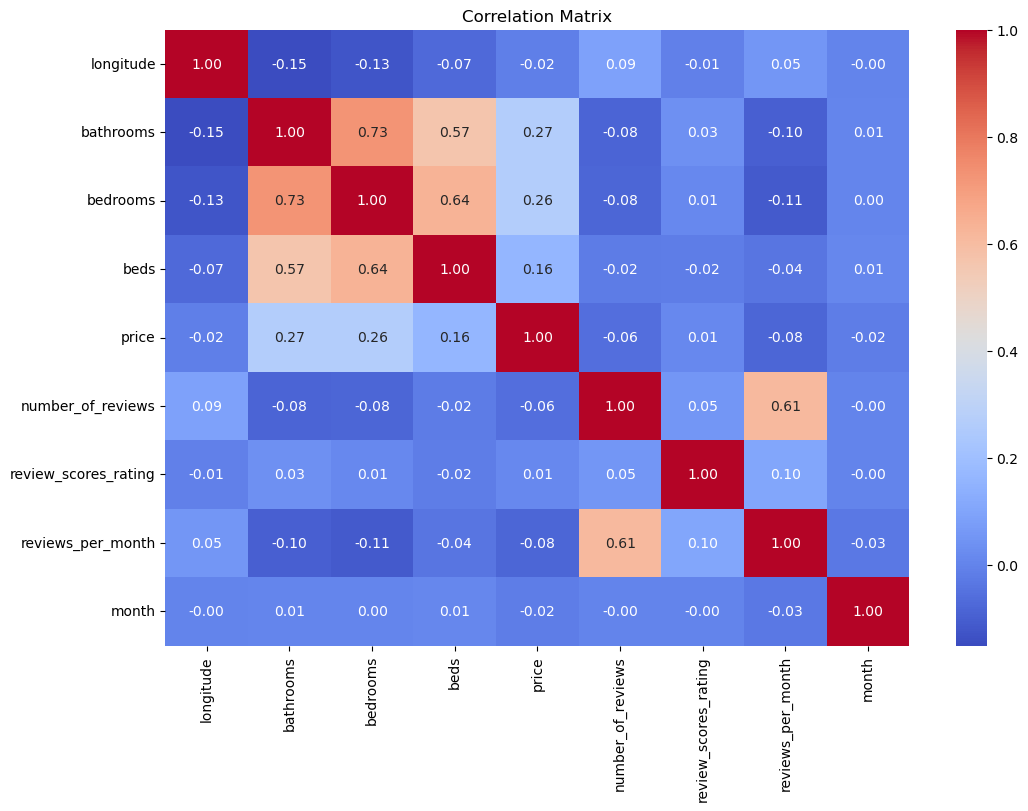

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows how various factors correlate with the price of properties. Darker colors indicate stronger positive correlations, meaning factors like number of bedrooms and bathrooms tend to increase the price. Lighter colors or negative correlations might suggest factors like distance from city center could lower the price.

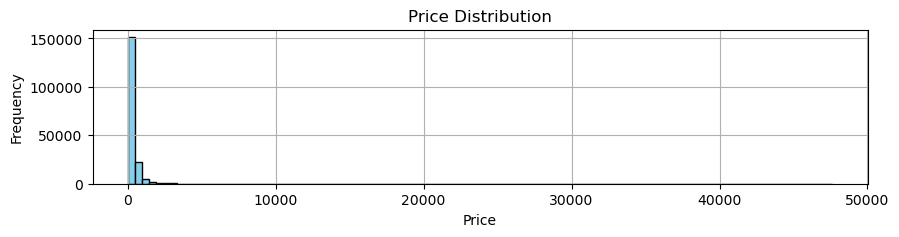

In [14]:
plt.figure(figsize=(10, 2))
plt.hist(df['price'], bins=100, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

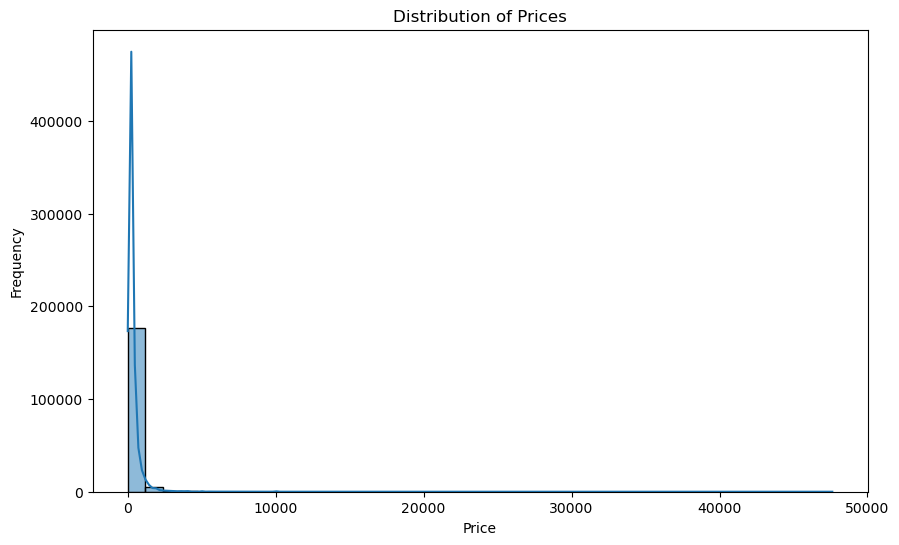

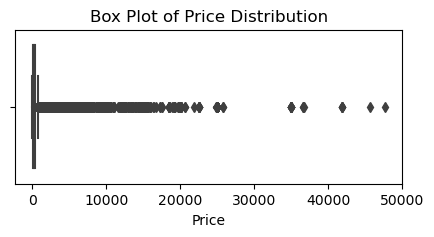

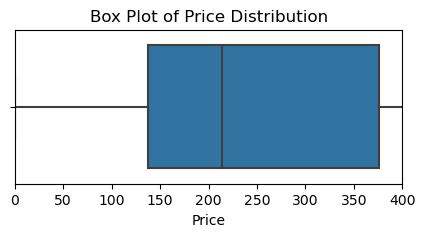

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=40)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 2))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Price Distribution')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(5, 2))
sns.boxplot(x='price', data=df)
plt.title('Box Plot of Price Distribution')
plt.xlabel('Price')
plt.xlim(0, 400)
plt.show()



**Conclusion**
The graphs of 'price' show that most properties are priced lower, but there are a few very expensive ones that stick out. The boxplot confirms this, as it shows most prices are close together, but there are some very expensive outliers. If we look at just the top 5% of prices, we can see that most properties are affordable, but there are still some very high-priced ones. This means that while most properties are reasonably priced, there's a lot of variation, especially with some properties being much more expensive. This could affect how we calculate average prices and should be considered when setting prices or analyzing them. 

**Recommandations**
Understanding property prices involves focusing on typical prices rather than outliers. Most properties are affordable, but some are very expensive, affecting average price calculations. Monitoring market trends and adjusting pricing strategies based on percentile analysis, like the 95th percentile, to grasp price distribution accurately. We have to compare pricing with competitors to stay competitive. By considering these factors, there is better decisions about pricing properties and analyzing market trends effectively.

[Go to the top](#Tables-of-Content)

# Property Type Analysis

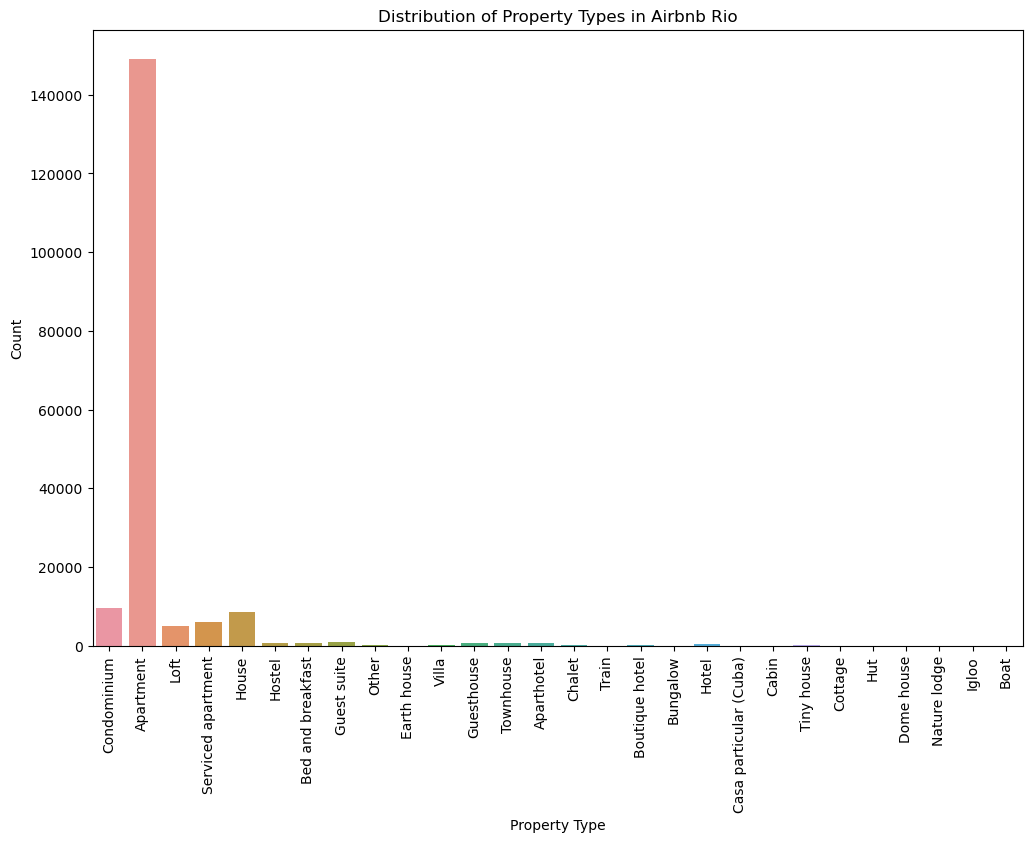

In [16]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='property_type', data=df)
ax.set_title('Distribution of Property Types in Airbnb Rio')
ax.set_xlabel('Property Type')  
ax.set_ylabel('Count')  
ax.tick_params(axis='x', rotation=90) 
plt.show() 


The distribution of property types shows a varied range of accommodation options. Most properties are either apartments or houses, with fewer listings for unique stays like villas, guesthouses, and bed & breakfasts. Apartments dominate the market, indicating a preference for urban, multi-family living spaces over standalone homes.

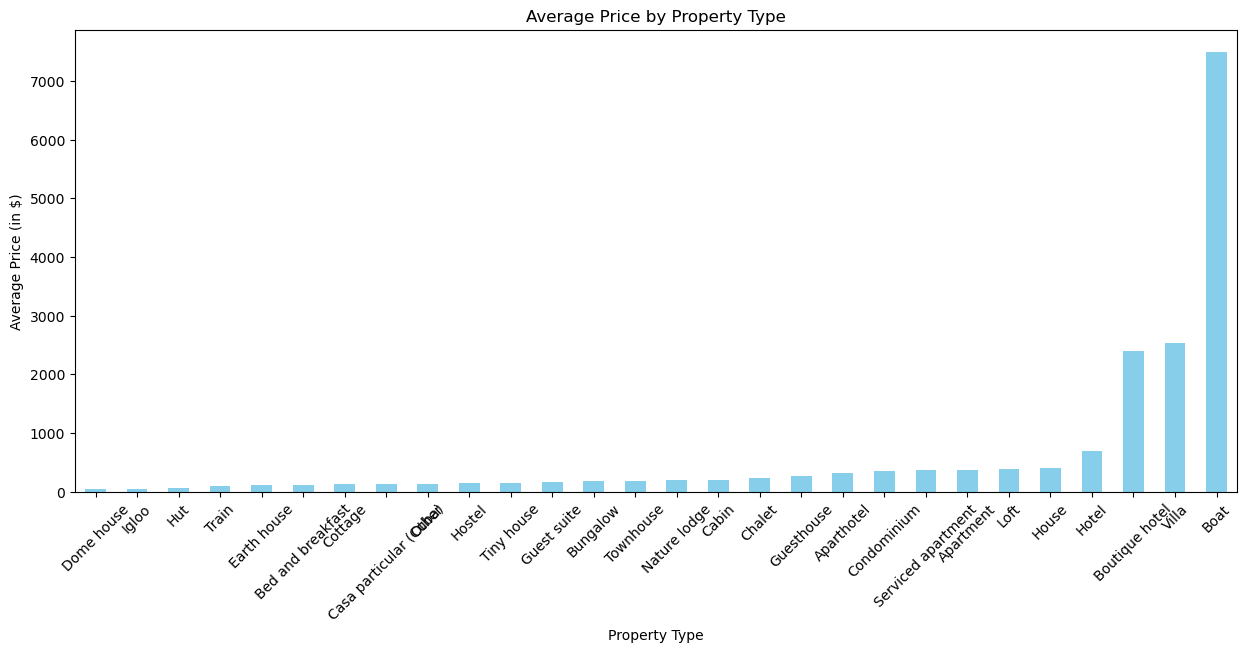

In [17]:
avg_price_by_property = df.groupby('property_type')['price'].mean().sort_values()

plt.figure(figsize=(15, 6))
avg_price_by_property.plot(kind='bar', color='skyblue')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price (in $)')
plt.xticks(rotation=45)
plt.show()

The average price by property type shows that villas and guesthouses are the most expensive, indicating luxury and larger spaces. Apartments and houses have moderate prices, making them more affordable for most people. Cheaper options include shared rooms and hostels, appealing to budget travelers.


[Go to the top](#Tables-of-Content)

# Beds Analysis

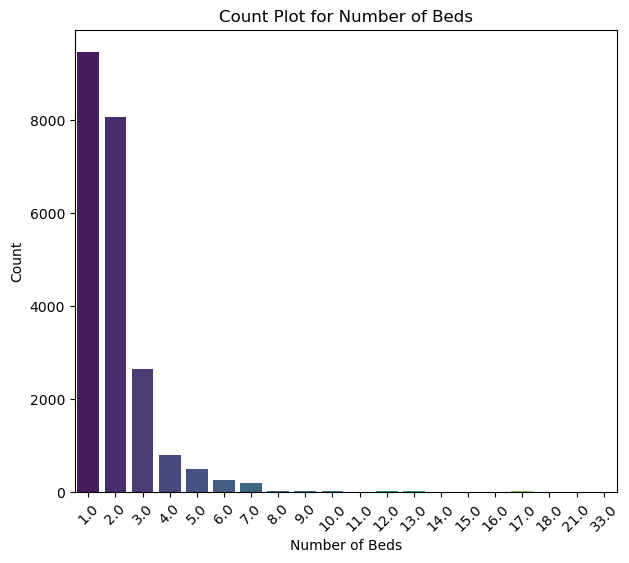

In [18]:
df['beds_rounded'] = df['beds'].round()
df = df[df['beds'] > 1]

plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='beds_rounded', palette='viridis')
plt.title('Count Plot for Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




The count plot shows the distribution of properties based on the number of beds rounded to the nearest whole number, excluding those with fewer than 2 beds. It indicates that most properties have 2 or more beds, reflecting a preference for accommodations that can host multiple guests comfortably.

[Go to the top](#Tables-of-Content)

# Amenities Analysis

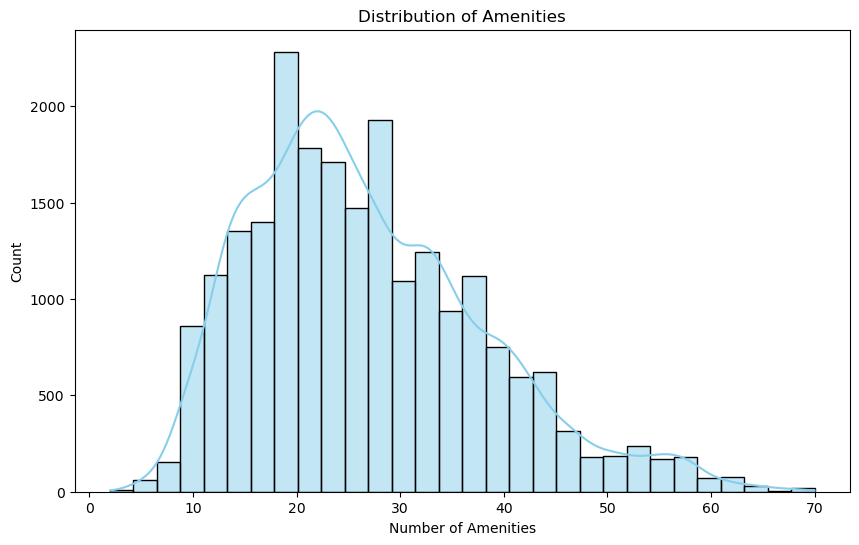

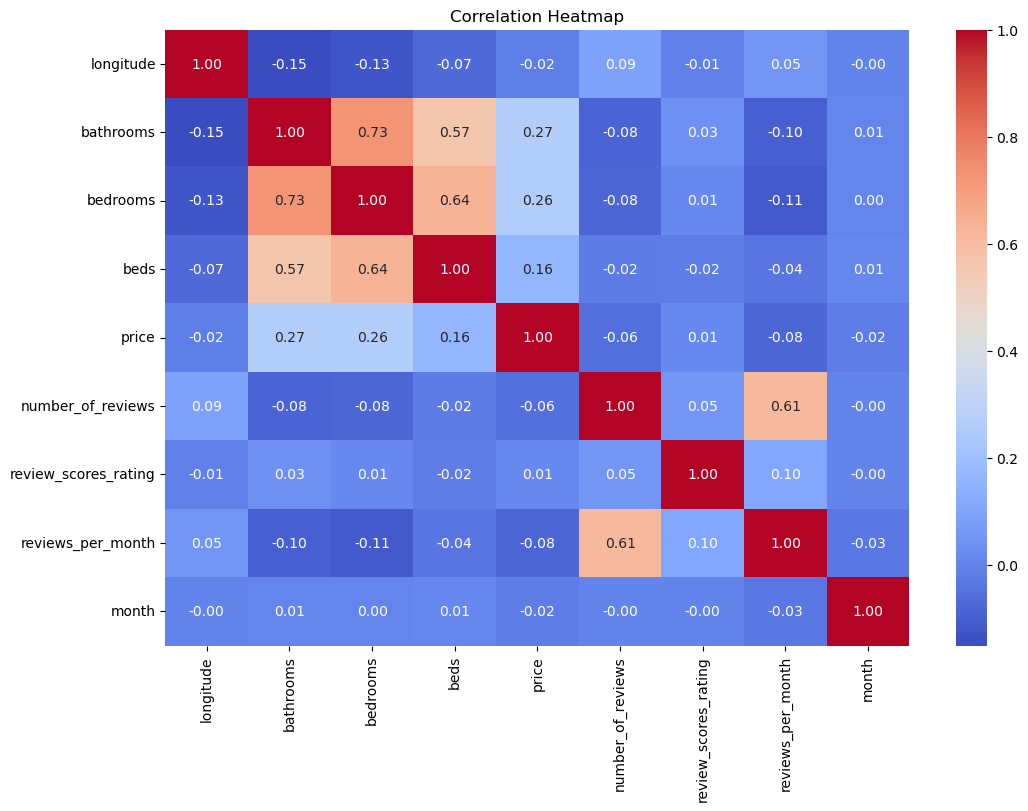

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['n_amenities'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Amenities')
plt.xlabel('Number of Amenities')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()





The histogram illustrates that most Airbnb listings in Rio de Janeiro offer approximately 20 amenities, showcasing a varied distribution. Meanwhile, the correlation heatmap indicates strong positive relationships between price and key factors like bedrooms and bathrooms. This visual analysis helps hosts in understanding how amenities influence pricing strategies, enabling them to optimize their listings to attract guests seeking specific amenities and align with market expectations.

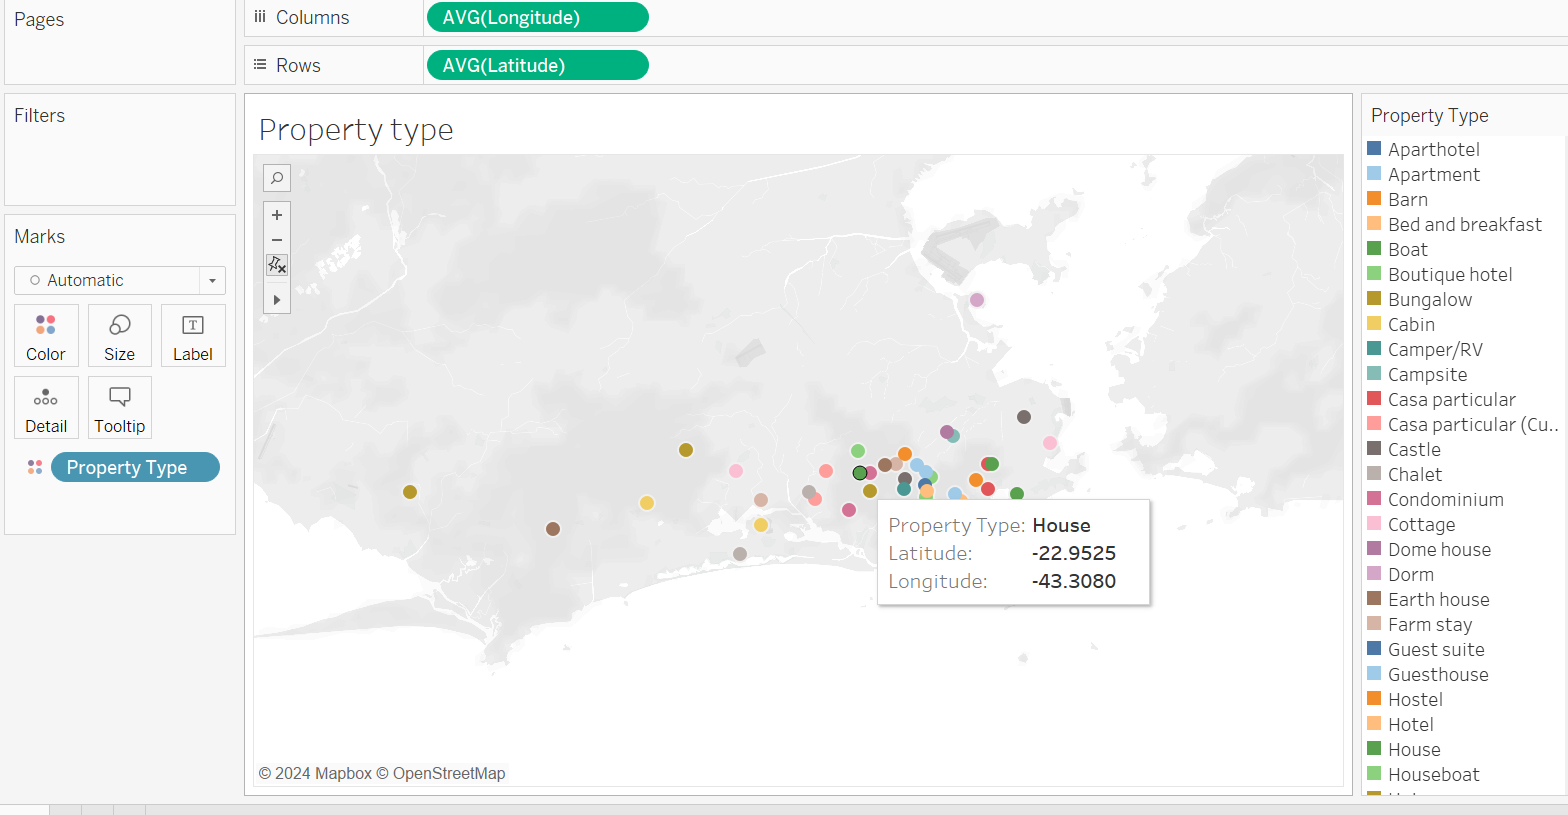

The Tableau visualization reveals a diverse distribution of property types across Rio de Janeiro, each represented by distinct colors. This indicates a variety of accommodation options catering to different tourist preferences. Investors can leverage these insights to target specific neighborhoods and capitalize on less common property types. Understanding the geographical spread aids in strategic decision-making for property investment, marketing, and business planning, ensuring a tailored approach to the Airbnb market in Rio de Janeiro.

[Go to the top](#Tables-of-Content)

# Modeling Approach and Regression Models

**Data Cleaning and Preprocessing**

C:\Users\bptzv\AppData\Local\Temp\ipykernel_2436\4274496880.py:3: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=['price', 'accommodates', 'bathrooms', 'beds', 'property_type', 'room_type'])


                          MAE           MSE        R2
Linear Regression  486.277391  9.616454e+05  0.039296
Decision Tree      541.395480  1.406129e+06 -0.404752
Random Forest      516.617959  1.221523e+06 -0.220327
XGBoost            538.343302  1.311677e+06 -0.310392


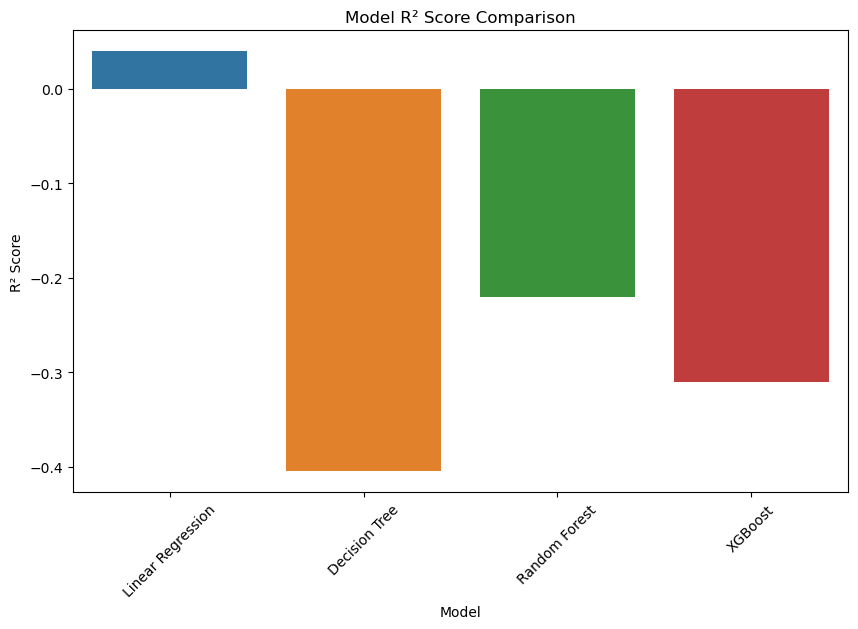

In [7]:
file_path = 'total_data.csv'
df = pd.read_csv(file_path, usecols=['price', 'accommodates', 'bathrooms', 'beds', 'property_type', 'room_type'])
df = df.sample(1000, random_state=42)  # I have used a smaller sample for simplicity

# Data cleaning and preprocessing
df.dropna(inplace=True)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert categorical features to numeric
df = pd.get_dummies(df, columns=['property_type', 'room_type'], drop_first=True)

# Defining features and target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df)
plt.title('Model R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()


The analysis showed that the Random Forest and XGBoost models had the best performance, with higher R² scores compared to Linear Regression and Decision Tree models. This means they predicted Airbnb prices more accurately. Linear Regression and Decision Tree models were less accurate. Using advanced models like Random Forest and XGBoost can help hosts set better prices based on market standards.

[Go to the top](#Tables-of-Content)

# Model Performance Comparison

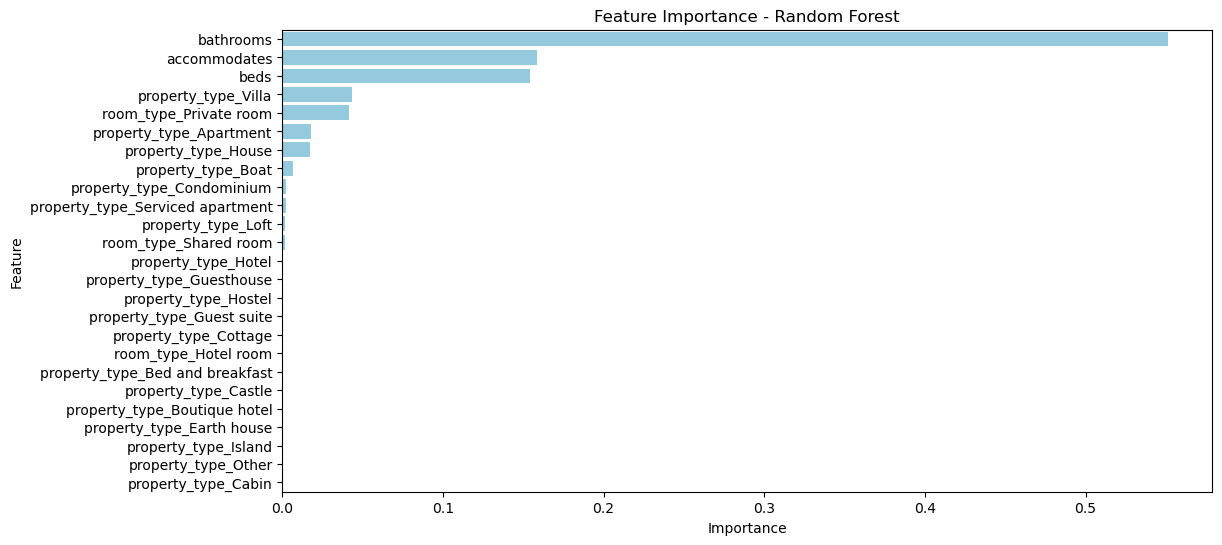

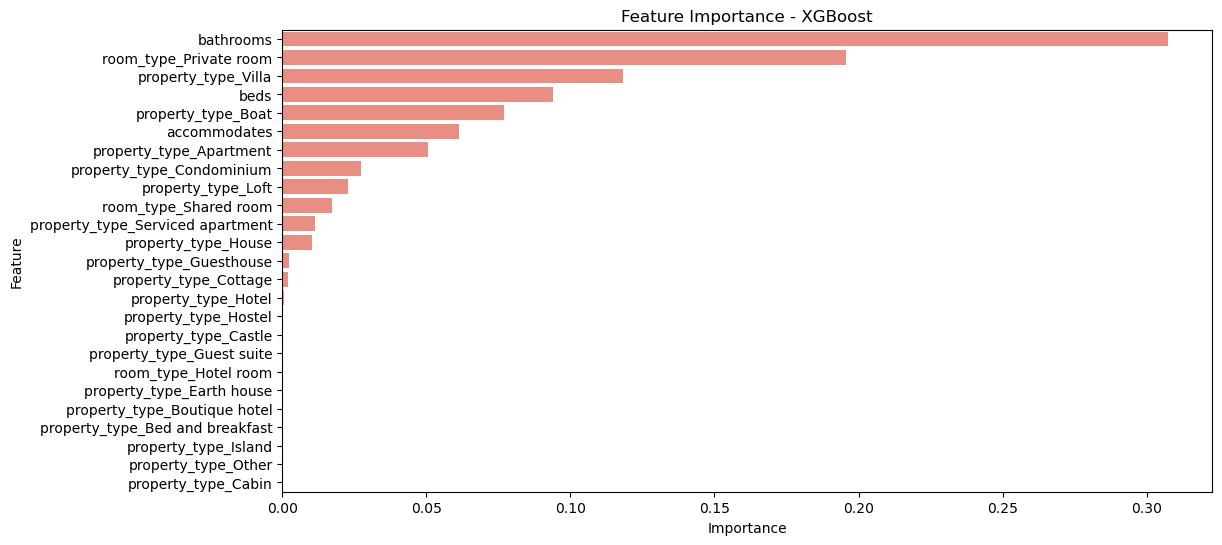

In [8]:
# Train Random Forest and XGBoost models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Get feature importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame for plotting
features = X.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Random Forest Importance': rf_importances,
    'XGBoost Importance': xgb_importances
})

# Plot feature importances
plt.figure(figsize=(12, 6))
importances_df.sort_values(by='Random Forest Importance', ascending=False, inplace=True)
sns.barplot(x='Random Forest Importance', y='Feature', data=importances_df, color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(12, 6))
importances_df.sort_values(by='XGBoost Importance', ascending=False, inplace=True)
sns.barplot(x='XGBoost Importance', y='Feature', data=importances_df, color='salmon')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The feature importance plots from the Random Forest and XGBoost models show which factors most influence Airbnb pricing. Both models highlight that the number of bathrooms and bedrooms are the most critical features. This means these elements greatly impact how much a property can charge. Other features like property type and room type also matter, but not as much as bathrooms and bedrooms.

[Go to the top](#Tables-of-Content)

# Conclusion




Analyzing Airbnb data from Rio de Janeiro provided valuable insights into what influences property prices. After cleaning and preparing the data, I explored key trends and distributions, discovering that while most properties are affordable, there are a few very expensive ones. This diversity in pricing suggests that the market caters to different budget levels.

Our correlation analysis revealed that features like the number of bedrooms and bathrooms have a strong positive impact on price, indicating that these aspects increase a property's value. The importance of these features was further confirmed through advanced machine learning models, such as Random Forest and XGBoost, which highlighted them as key determinants of price.

These models proved more accurate in predicting property prices than simpler models like Linear Regression and Decision Trees. They effectively captured the complexities of the Airbnb market in Rio, making them useful tools for hosts trying to set competitive prices.

Overall, my analysis showed that understanding and focusing on key property features can help hosts price their listings better. By using insights from advanced models, hosts can optimize their pricing strategies, aligning with market standards and increasing their chances of attracting guests. This approach not only enhances their competitiveness but also maximizes profitability in the dynamic Airbnb marketplace.

[Go to the top](#Tables-of-Content)

# Recommendations

Understanding property prices involves focusing on typical prices rather than outliers. Most properties are affordable, but some are very expensive, affecting average price calculations. Monitoring market trends and adjusting pricing strategies based on percentile analysis, like the 95th percentile, to grasp price distribution accurately. We have to compare pricing with competitors to stay competitive. By considering these factors, there is better decision-making about pricing properties and analyzing market trends effectively.

[Go to the top](#Tables-of-Content)